In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import pandas as pd
import plotly.express as px
import torch
import torch.nn as nn



df = pd.read_csv('prediction_results.csv')
df.iloc[1]

Unnamed: 0                                1
symbol                                GOOGL
date                             2024-05-15
hour                                     12
minute                                   30
upside_threshold_prediction               0
alert_price                          171.07
strategy                         CDGAINC_2H
downside_threshold_prediction             1
target                               172.26
prediction                       171.399407
target_index                              3
prediction_index                          3
Name: 1, dtype: object

In [23]:
df['real_price_change'] = ((df['target'] - df['alert_price'])/df['alert_price']) * 100
df['predicted_price_change'] = ((df['prediction'] - df['alert_price'])/df['alert_price'])*100
df['residuals'] = (df['real_price_change'] - df['predicted_price_change'])/df['real_price_change']

In [18]:
df

,Unnamed: 0,symbol,date,hour,minute,upside_threshold_prediction,alert_price,strategy,downside_threshold_prediction,target,prediction,target_index,prediction_index,real_price_change,predicted_price_change,residuals
0,0,QQQ,2023-12-08,11,0,1,392.325,CDGAINC_2H,0,392.4700,392.223306,0,0,0.036959,-0.025921,0.062880
1,1,GOOGL,2023-07-14,10,30,0,126.170,CDGAINC_2H,0,126.2700,126.435956,0,3,0.079258,0.210792,-0.131533
2,2,GOOG,2023-08-14,11,0,1,131.580,CDGAINC_2H,1,131.9000,131.837980,1,0,0.243198,0.196063,0.047135
3,3,NVDA,2023-12-12,13,0,0,46.971,CDGAINC_2H,0,47.4650,47.052856,3,0,1.051713,0.174270,0.877442
4,4,XOM,2023-07-19,13,0,0,101.785,CDGAINC_2H,1,101.9200,102.016347,3,0,0.132633,0.227290,-0.094658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,252,AMZN,2023-07-28,11,30,1,132.130,CDGAINC_2H,0,133.0100,132.372639,1,0,0.666011,0.183637,0.482374
9506,253,DIS,2023-10-31,13,0,0,81.245,CDGAINC_2H,1,81.5373,81.471041,3,0,0.359776,0.278221,0.081555
9507,254,QQQ,2024-01-08,12,0,0,401.970,CDGAINC_2H,0,403.5500,402.370001,3,0,0.393064,0.099510,0.293554
9508,255,AAPL,2023-11-01,11,30,0,171.430,CDGAINC_2H,0,172.3800,171.646374,3,0,0.554162,0.126217,0.427945


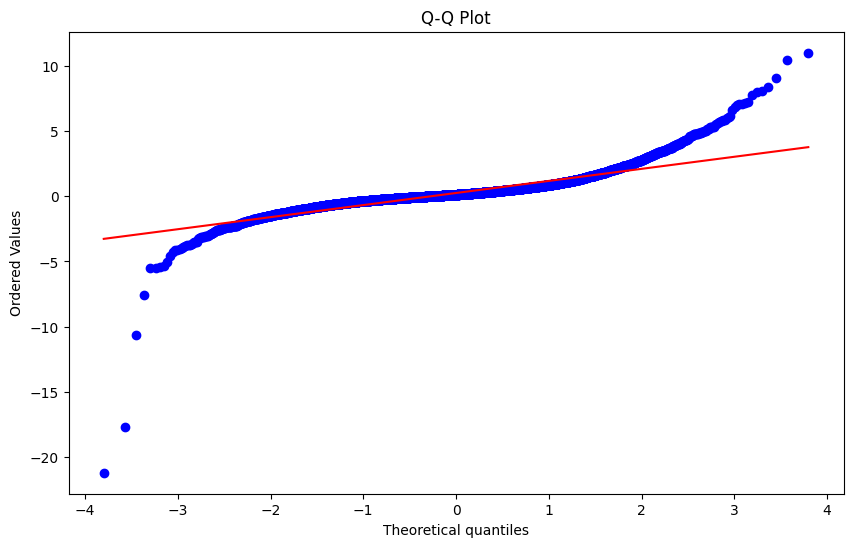

In [10]:
# 2. Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(df['residuals'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [32]:
fig = px.histogram(df, x="residuals", nbins=50, title='Histogram of Residuals')
fig.update_layout(bargap=0.05)
fig.show()

In [39]:
fig = px.scatter(
    df, x='predicted_price_change', y='real_price_change',color='residuals',
    title='Real vs Predicted Price Change',hover_data=['symbol'],symbol='upside_threshold_prediction',
                 )
fig.show()

In [41]:
fig = px.scatter(
    df.loc[df['upside_threshold_prediction'] == 1], x='predicted_price_change', y='real_price_change',color='residuals',
    title='Real vs Predicted Price Change',hover_data=['symbol']
                 )
fig.show()

In [44]:
fig = px.scatter(
    df.loc[df['upside_threshold_prediction'] == 0], x='predicted_price_change', y='real_price_change',color='residuals',
    title='Real vs Predicted Price Change',hover_data=['symbol']
                 )
fig.show()

In [45]:
df.groupby('symbol')['residuals'].describe()

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAPL,503.0,0.098436,0.286978,-0.832357,-0.074360,0.079806,0.269993,1.018148
AMD,539.0,0.267025,0.697071,-1.739917,-0.150644,0.233561,0.655685,3.184227
AMZN,526.0,0.113078,0.381300,-1.193057,-0.117788,0.088775,0.359334,1.609127
BA,516.0,0.112739,0.500334,-1.431855,-0.186678,0.061808,0.336670,2.445941
BAC,1.0,0.767099,NaN,0.767099,0.767099,0.767099,0.767099,0.767099
C,1.0,-0.386858,NaN,-0.386858,-0.386858,-0.386858,-0.386858,-0.386858
DIS,469.0,0.149929,0.406063,-1.170766,-0.073937,0.088579,0.355697,1.862181
GOOG,532.0,0.117084,0.389111,-0.996282,-0.120799,0.095231,0.343739,2.042890
GOOGL,534.0,0.117859,0.397046,-1.049596,-0.127808,0.098994,0.347649,2.093341


In [ ]:
loss = nn.MSELoss()

tensor1 = torch.tensor(results_df['prediction'].values, dtype=torch.float32)
tensor2 = torch.tensor(results_df['target'].values, dtype=torch.float32)
predictions_loss = loss(tensor1, tensor2)
print(f"Test Loss: {predictions_loss}")
